Name: Lim Yu Yang Ian

Class: DAAA/FT/2A/02

Admin No: 2201874

___

# Importing Modules

In [606]:
# Import Libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Models
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDClassifier, LinearRegression, LogisticRegression, Ridge, ElasticNet, Lasso
from sklearn.compose import TransformedTargetRegressor
from sklearn.dummy import DummyRegressor

# Import Model Evaluation Tools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, cross_validate, learning_curve

#for saving models
import pickle

### Objective

To predict the price of a house based on the following attributes:

- City
- House Area (sqm)
- No. of toilets
- No. of bedrooms
- Stories
- Renovation Status

### Background Information:

A house has many factors that determine it's value. There is the city, no. of toilets, stories, renovation status, and no. of bedrooms. Besides those in the dataset, there are other factors such as location within the city, ammenities surrouding, road access, traffic within the area, etc.

It is important to predict the prices of housing as it allows property agents to identify trends in the market. It allows these property agents proper information and data to calculate the risks that come with the purchasing and selling of each house. It also allows them to stay competitive, and create good pricing strategies.

Gomez, J. (2022). Opendoor | Sell your home the minute you’re ready. [online] opendoor.com. Available at: https://www.opendoor.com/articles/factors-that-influence-home-value.

### Additional Information:

"The value of every good in a market economy is based on a price discovery process. Producers and resellers propose hypothetical values and hope to find buyers with similar valuations. In contrast, consumers bid up or push down prices based on their changing interpretations of the value of goods. This process is imperfect and ever-changing.

For the real estate market, a buyer must value a property higher than the amount they are willing to trade for that property. At the same time, the seller must value the property at a price below the money offered. Of course, the supply and demand for a home in a given region will play into these economic evaluations, as well as the state of the broader economy in terms of GDP growth, unemployment, and inflation."

Investopedia. (n.d.). How the Real Estate Market Determines the Value of a Property. [online] Available at: https://www.investopedia.com/ask/answers/072915/how-market-value-determined-real-estate-market.asp.

In [607]:
random_state = 40

As data collection has already been carried out, we can skip the first step and move to exploring the data.

___

# Data observation

In [608]:
df = pd.read_csv("./ST1511 AIML-CA1-datasets/housing_dataset.csv")
original = df.copy()
df.head()

,House ID,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price ($)
0,0,Chicago,742.0,4,2,3,furnished,1330000
1,1,Denver,896.0,4,4,4,furnished,1225000
2,2,Chicago,996.0,3,2,2,semi-furnished,1225000
3,3,Seattle,750.0,4,2,2,furnished,1221500
4,4,New York,742.0,4,1,2,furnished,1141000


There are no Null values as shown below. Thus no actions need to be taken to handle them.

In [609]:
df.isna().sum()

House ID             0
City                 0
House Area (sqm)     0
No. of Bedrooms      0
No. of Toilets       0
Stories              0
Renovation Status    0
Price ($)            0
dtype: int64

In [610]:
df.describe()

,House ID,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Price ($)
count,545.00000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,272.00000,515.054128,2.965138,1.286239,1.805505,4.766729e+05
std,157.47222,217.014102,0.738064,0.502470,0.867492,1.870440e+05
min,0.00000,165.000000,1.000000,1.000000,1.000000,1.750000e+05
25%,136.00000,360.000000,2.000000,1.000000,1.000000,3.430000e+05
50%,272.00000,460.000000,3.000000,1.000000,2.000000,4.340000e+05
75%,408.00000,636.000000,3.000000,2.000000,2.000000,5.740000e+05
max,544.00000,1620.000000,6.000000,4.000000,4.000000,1.330000e+06


As seen below, House area is a float, not an integer. This will need to be standardizes later on to allow for the model to train on this data with more ease.

Renovation Statu, and city is also not an integer, So encoding will need to be carried out to resolve this issue.

In [611]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   House ID           545 non-null    int64  
 1   City               545 non-null    object 
 2   House Area (sqm)   545 non-null    float64
 3   No. of Bedrooms    545 non-null    int64  
 4   No. of Toilets     545 non-null    int64  
 5   Stories            545 non-null    int64  
 6   Renovation Status  545 non-null    object 
 7   Price ($)          545 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 34.2+ KB


In [612]:
display(df.value_counts("City"))
display(df.value_counts("No. of Bedrooms"))
display(df.value_counts("No. of Toilets"))
display(df.value_counts("Stories"))
display(df.value_counts("Renovation Status"))

City
New York    158
Seattle     134
Boston      105
Denver       89
Chicago      59
dtype: int64

No. of Bedrooms
3    300
2    136
4     95
5     10
1      2
6      2
dtype: int64

No. of Toilets
1    401
2    133
3     10
4      1
dtype: int64

Stories
2    238
1    227
4     41
3     39
dtype: int64

Renovation Status
semi-furnished    227
unfurnished       178
furnished         140
dtype: int64

In [613]:
sns.set_style("darkgrid")

Target variable is price

Below, I use a histplot, and kdeplot to show the ditribution of Price, and house area. As well as their distribution by city

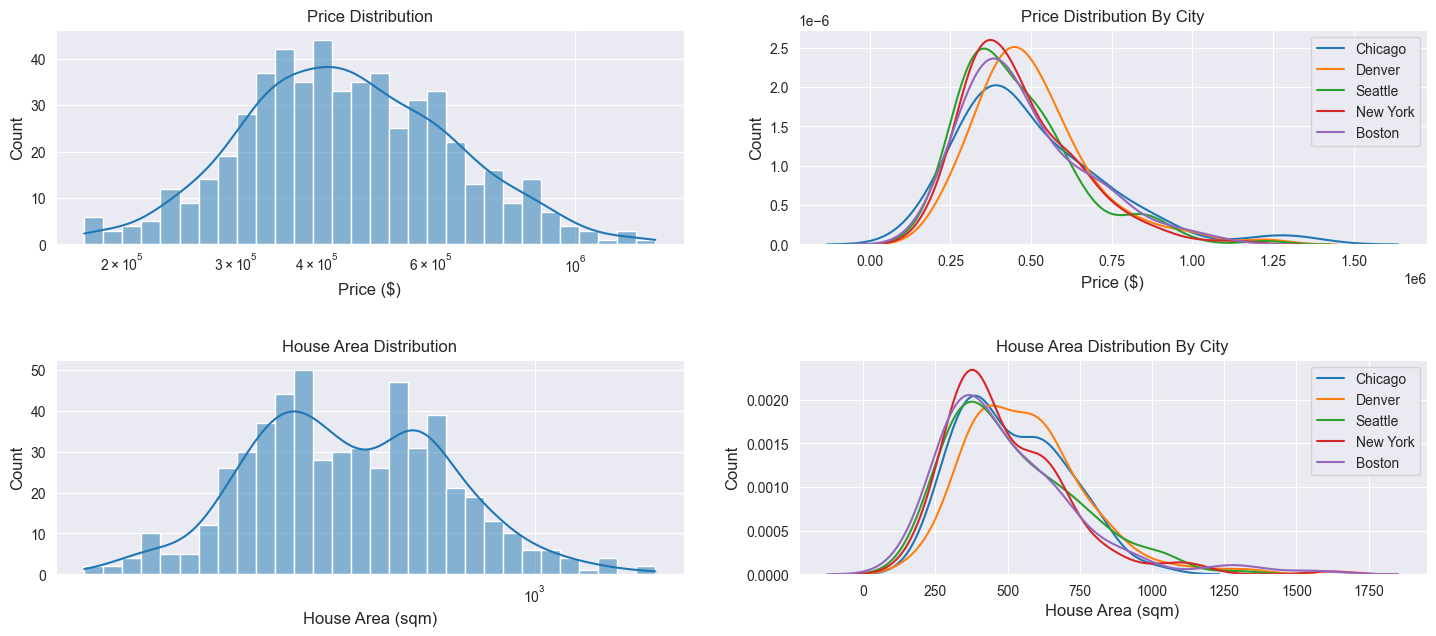

In [614]:
fig = plt.figure(figsize=(15, 7))
ax1, ax2, ax3, ax4 = fig.add_subplot(221), fig.add_subplot(222), fig.add_subplot(223), fig.add_subplot(224)

sns.histplot(data=df, x="Price ($)", kde=True, log_scale=True, bins=30, ax=ax1)

#  set labels
ax1.set_title("Price Distribution")
ax1.set_xlabel("Price ($)", size=12)
ax1.set_ylabel("Count", size=12)

for city in pd.unique(df["City"]):
    sns.kdeplot(data=df[df["City"] == city]["Price ($)"], label=city, ax=ax2)

#  set labels
ax2.set_title("Price Distribution By City")
ax2.legend()
ax2.set_xlabel("Price ($)", size=12)
ax2.set_ylabel("Count", size=12)

sns.histplot(data=df, x="House Area (sqm)", kde=True, log_scale=True, bins=30, ax=ax3)

#  set labels
ax3.set_title("House Area Distribution")
ax3.set_xlabel("House Area (sqm)", size=12)
ax3.set_ylabel("Count", size=12)

for city in pd.unique(df["City"]):
    sns.kdeplot(data=df[df["City"] == city]["House Area (sqm)"], label=city, ax=ax4)

#  set labels
ax4.set_title("House Area Distribution By City")
ax4.legend()
ax4.set_xlabel("House Area (sqm)", size=12)
ax4.set_ylabel("Count", size=12)

fig.tight_layout(pad=3.0)
plt.show()

I use countplot to show the counts of city, no. of bedrooms, stories, no. of toilets, and renovation status

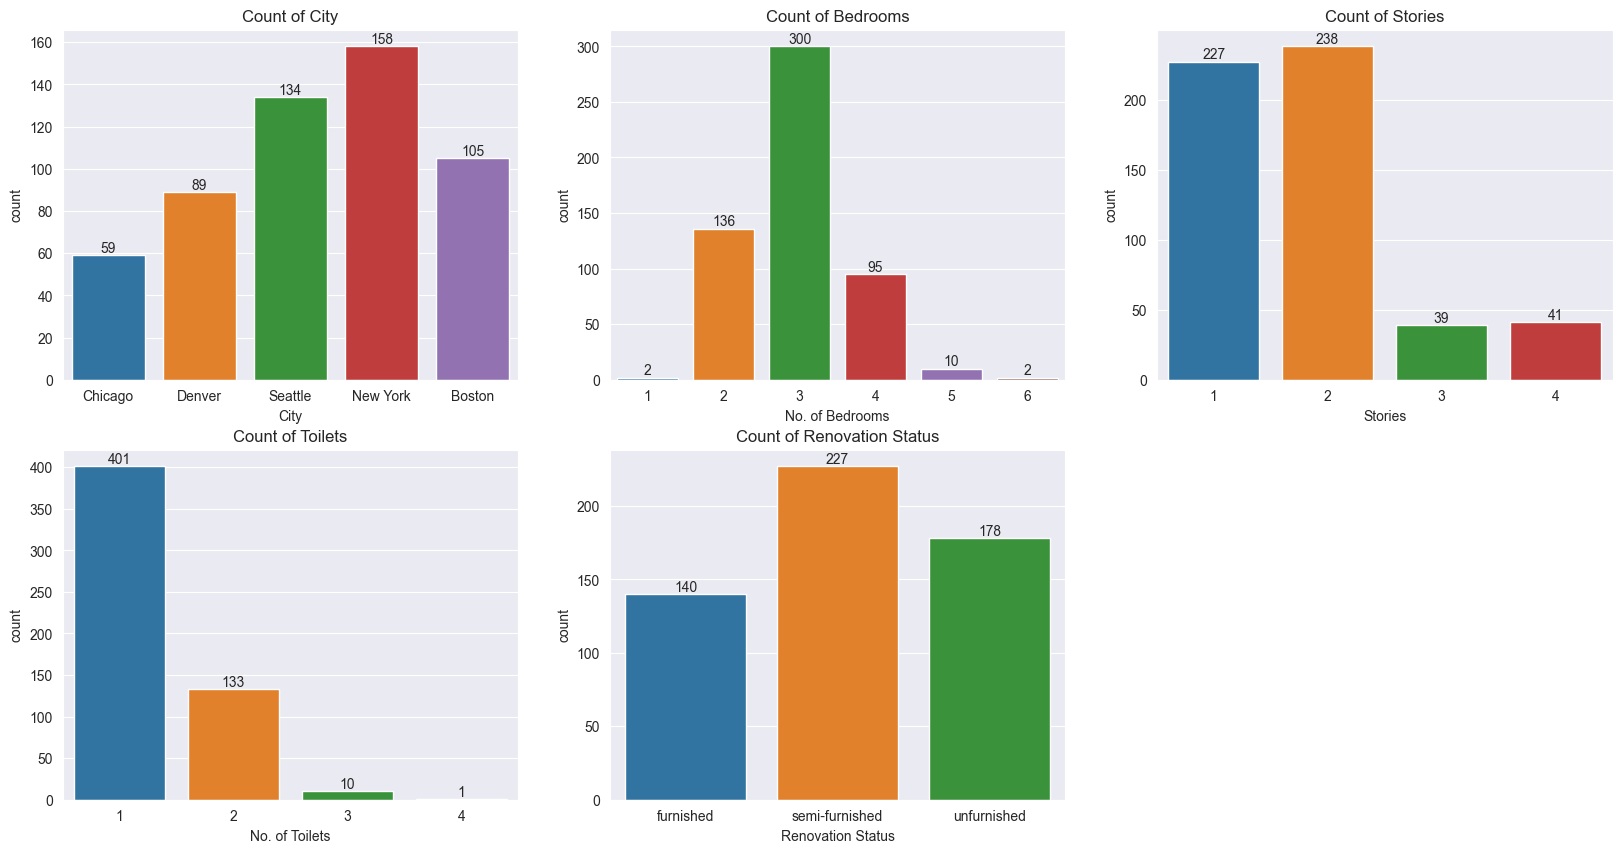

In [615]:
fig = plt.figure(figsize=(20, 10))
ax1, ax2, ax3, ax4, ax5 = fig.add_subplot(231), fig.add_subplot(232), fig.add_subplot(233), fig.add_subplot(234), fig.add_subplot(235)

ax1.set_title("Count of City")
ax = sns.countplot(x = df["City"], ax=ax1)
ax.bar_label(ax.containers[0])

ax2.set_title("Count of Bedrooms")
ax = sns.countplot(x = df["No. of Bedrooms"], ax=ax2)
ax.bar_label(ax.containers[0])

ax3.set_title("Count of Stories")
ax = sns.countplot(x = df["Stories"], ax=ax3)
ax.bar_label(ax.containers[0])

ax4.set_title("Count of Toilets")
ax = sns.countplot(x = df["No. of Toilets"], ax=ax4)
ax.bar_label(ax.containers[0])

ax5.set_title("Count of Renovation Status")
ax = sns.countplot(x = df["Renovation Status"], ax=ax5)
ax.bar_label(ax.containers[0])

plt.show()

I use a heatplot to show the correlation between my variables in the dataset.

C:\Users\ianli_gu6oysd\AppData\Local\Temp\ipykernel_17892\172161371.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'GnBu')


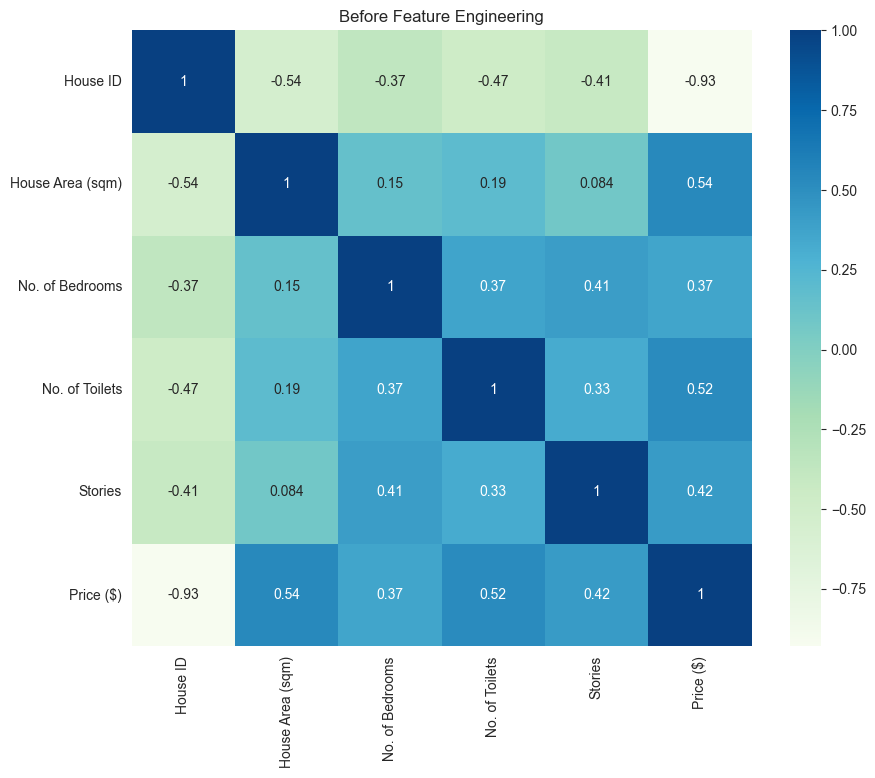

In [616]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, cmap = 'GnBu')
plt.title("Before Feature Engineering")
plt.show()

Housing ID and price have no correlation whatsoever, so I will drop it. Number of toilets, and House Area has a high correlation >0.5. This shows as mentioned in my background information how these factors influence the price of a house.

___

# Feature Engineering

I add the features below

#### Toilets per Bedroom

This is as Master bedrooms, with toilets adjacent to the bedroom, tend to add value to houses.

Thus I calculate the toilet to bedroom ratio. Where the higher the ratio - More toilets to bedrooms, the higher the amount of "Master Bedrooms" there will tend to be.

Thus this feature will allow my prediction model to capture not just the amount of bedrooms and toilets, but the possible increase in value due to "Master Bedrooms"

hoa.org.uk. (2017). Looking To Add Value To Your Home? Time To Think About Your ‘room Ratios’. [online] Available at: https://hoa.org.uk/2017/05/room-ratio/#:~:text=Research%20from%20insurer%20Direct%20Line [Accessed 8 Jun. 2023].

#### Area per floor

The database provides houses with several floors. So I break down how much space each floor has, so that the model can capture the average size of each floor, instead of just the total area.

In [617]:
toilets_per_bedroom = []
area_per_floor = []
for i, row in df.iterrows():
    number = row["No. of Bedrooms"] / row["No. of Toilets"]
    area = row["House Area (sqm)"] / row["Stories"]
    toilets_per_bedroom.append(number)
    area_per_floor.append(area)

df["Toilets Per Bedroom"] = toilets_per_bedroom
df["Area Per Floor"] = area_per_floor

df = df.drop(columns=["House ID"])

In [618]:
df.head()

,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price ($),Toilets Per Bedroom,Area Per Floor
0,Chicago,742.0,4,2,3,furnished,1330000,2.0,247.333333
1,Denver,896.0,4,4,4,furnished,1225000,1.0,224.000000
2,Chicago,996.0,3,2,2,semi-furnished,1225000,1.5,498.000000
3,Seattle,750.0,4,2,2,furnished,1221500,2.0,375.000000
4,New York,742.0,4,1,2,furnished,1141000,4.0,371.000000


C:\Users\ianli_gu6oysd\AppData\Local\Temp\ipykernel_17892\803085361.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'GnBu')


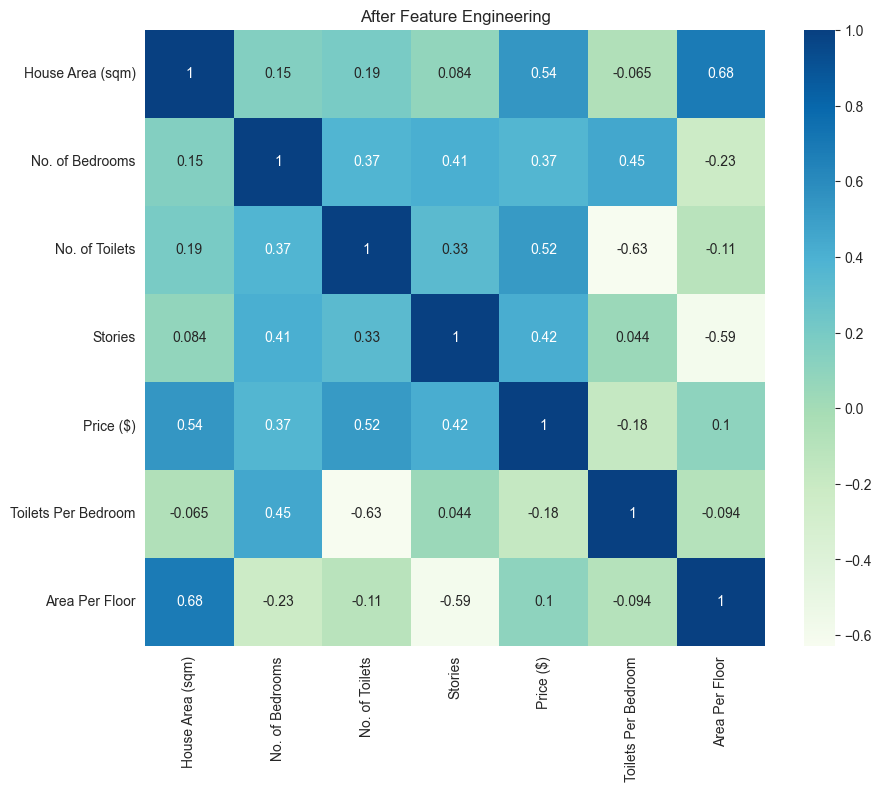

In [619]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, cmap = 'GnBu')
plt.title("After Feature Engineering")
plt.show()

In [620]:
X, y = df.drop(["Price ($)"], axis=1), df["Price ($)"]

In [621]:
display(X.head())

,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Toilets Per Bedroom,Area Per Floor
0,Chicago,742.0,4,2,3,furnished,2.0,247.333333
1,Denver,896.0,4,4,4,furnished,1.0,224.000000
2,Chicago,996.0,3,2,2,semi-furnished,1.5,498.000000
3,Seattle,750.0,4,2,2,furnished,2.0,375.000000
4,New York,742.0,4,1,2,furnished,4.0,371.000000


___

# Data preperation

##### We have multiple choices of Encoding methods here:

1. One Hot Encoding
    - One Hot encoding has the disadvantage of creating a high-dimentional and sparse representation when dealing with large number of categories. City, and Renovation Status do not have many categories. And thus this is not an issue. Thus I will use this encoding method
2. Label Encoding
    - Label encoding would introduce abitrary ordinal relationships between categories which might mislead the learning algorithm. So we will not use it.
3. Ordinal Encoding
    - It assumes uniform differences between my encoded values. Which is not the case here. Thus I will not use this encoding method.
4. Count Encoding
    - This normally results in overfitting. And my target variable of price has more than a 0.5 correlation value with some of my values. Thus I will not use this encoding method.
5. Binary Encoding
    - It assumes that the order of my categories matters. In this case, city does not have an order. Thus I will not use this encoding method.
6. Target Encoding
    - This encoding method generally leads to overfitting when there are a low number of entries in the dataset. The provided dataset has very few values. Thus I will not use this encoding method.



### One Hot Encoding

As previously stated, City, and Renovation Status are not integers. Thus I use One Hot Encoding to resolve this issue, and allow my model to train on this important data.

In [622]:
hot_col = ["City", "Renovation Status"]
ohe = OneHotEncoder()
ohe.fit(X[hot_col])
X = pd.concat([
    X.drop(hot_col, axis=1).reset_index(drop=True),
    pd.DataFrame(
        ohe.transform(X[hot_col]).toarray(),
        columns=ohe.get_feature_names_out(),
    ),
],
axis=1)
display(X)

,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Toilets Per Bedroom,Area Per Floor,City_Boston,City_Chicago,City_Denver,City_New York,City_Seattle,Renovation Status_furnished,Renovation Status_semi-furnished,Renovation Status_unfurnished
0,742.0,4,2,3,2.0,247.333333,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,896.0,4,4,4,1.0,224.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,996.0,3,2,2,1.5,498.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,750.0,4,2,2,2.0,375.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,742.0,4,1,2,4.0,371.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,300.0,2,1,1,2.0,300.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
541,240.0,3,1,1,3.0,240.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
542,362.0,2,1,1,2.0,362.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
543,291.0,3,1,1,3.0,291.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


___

# Standard Scaling

As previously said, House Area is not an integer, thus i need to standardise the data in order for the model to train on it better.

In [623]:
name_col = ["House Area (sqm)", "Toilets Per Bedroom", "Area Per Floor"]
sc = StandardScaler()
X[name_col] = sc.fit_transform(X[name_col])
X.head()

,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Toilets Per Bedroom,Area Per Floor,City_Boston,City_Chicago,City_Denver,City_New York,City_Seattle,Renovation Status_furnished,Renovation Status_semi-furnished,Renovation Status_unfurnished
0,1.046726,4,2,3,-0.629197,-0.453554,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.757010,4,4,4,-1.886822,-0.557532,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,2.218232,3,2,2,-1.258010,0.663464,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.083624,4,2,2,-0.629197,0.115353,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.046726,4,1,2,1.886053,0.097528,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


___

# Data Splitting

Here I split my data with 70% to training, and 30% to testing data.

In [624]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, random_state=random_state
)

print(X_train.shape)
print(X_test.shape)

(381, 14)
(164, 14)


___

# Training Models

In [625]:
scoring_methods = [
    "r2",
    "neg_root_mean_squared_error",
    "neg_mean_absolute_error",
    "neg_mean_absolute_percentage_error",
    "neg_mean_squared_error",
]
model_list = [
    LinearRegression(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    RandomForestRegressor(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    ExtraTreesRegressor(),
    Ridge(),
    ElasticNet(),
    Lasso(),
    HistGradientBoostingRegressor(),
    DummyRegressor()
]

model_list_names = [
    "LinearRegression()",
    "AdaBoostRegressor()",
    "GradientBoostingRegressor()",
    "RandomForestRegressor()",
    "KNeighborsRegressor()",
    "DecisionTreeRegressor()",
    "ExtraTreesRegressor()",
    "Ridge()",
    "ElasticNet()",
    "Lasso()",
    "HistGradientBoostingRegressor()",
    "DummyRegressor()"
]

In [626]:
def plot_learning_curve(model_name, model, X, y, train_sizes, cv):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=train_sizes, cv=cv)

    # Calculate mean and standard deviation of train and test scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
    plt.plot(train_sizes, test_mean, label='Validation Score', color='red')

    # Fill the area between the mean scores with color
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='red')

    # Customize plot
    plt.title(f'Learning Curve for {model_name}')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid(True)

We can see below that models such as KNN have poor learning curves, whilst models like Gradient Boosting have very good learning curve. This is as it exponentially increases with an increase in Training Examples.

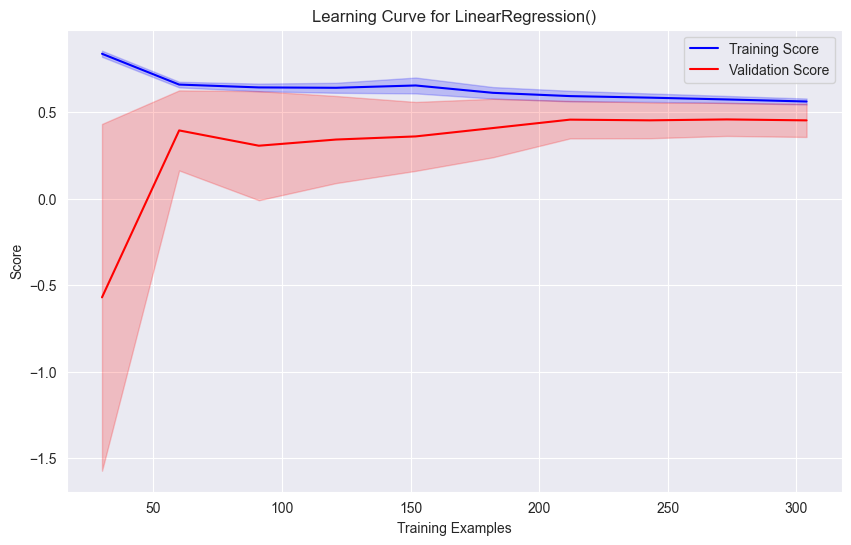

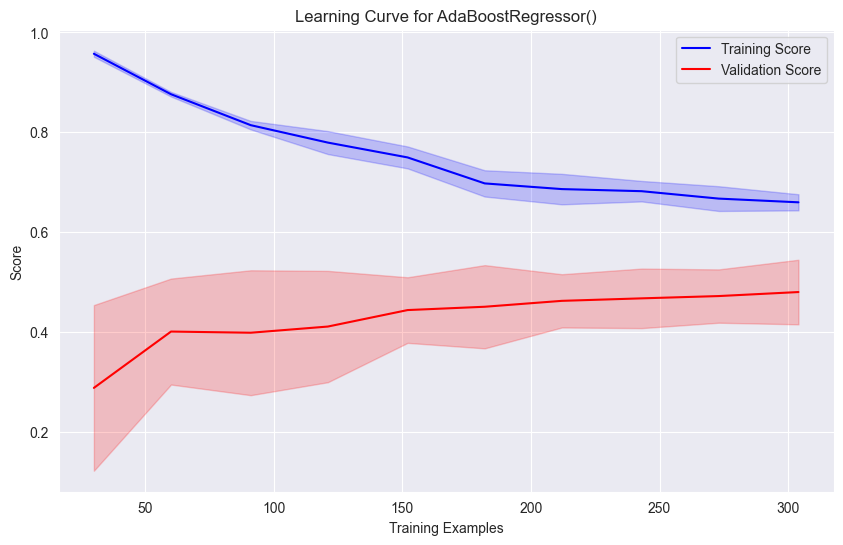

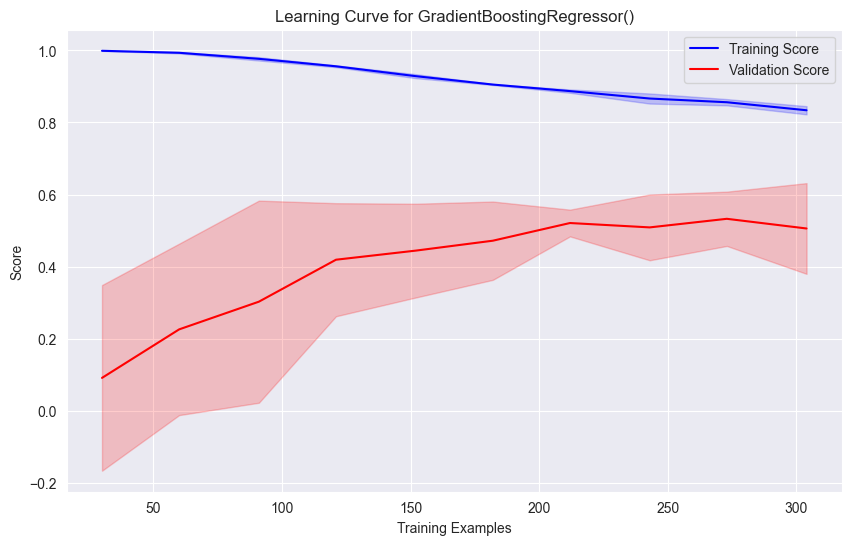

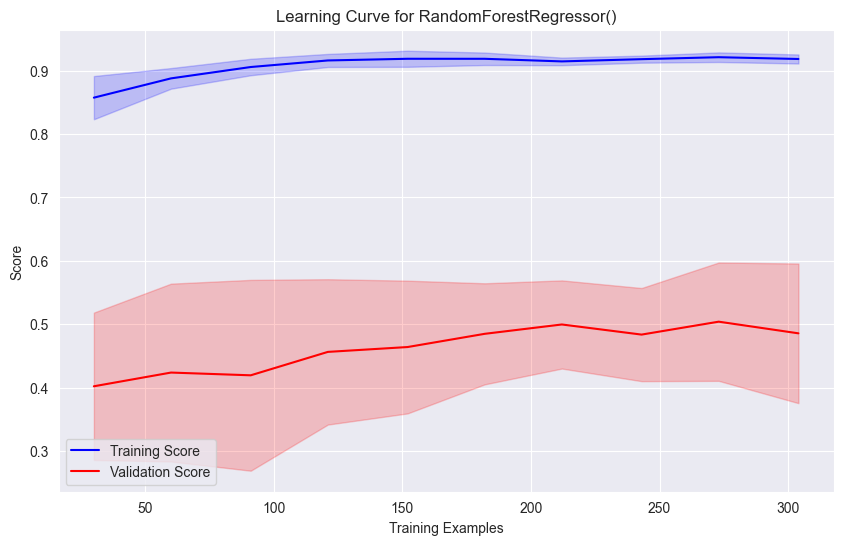

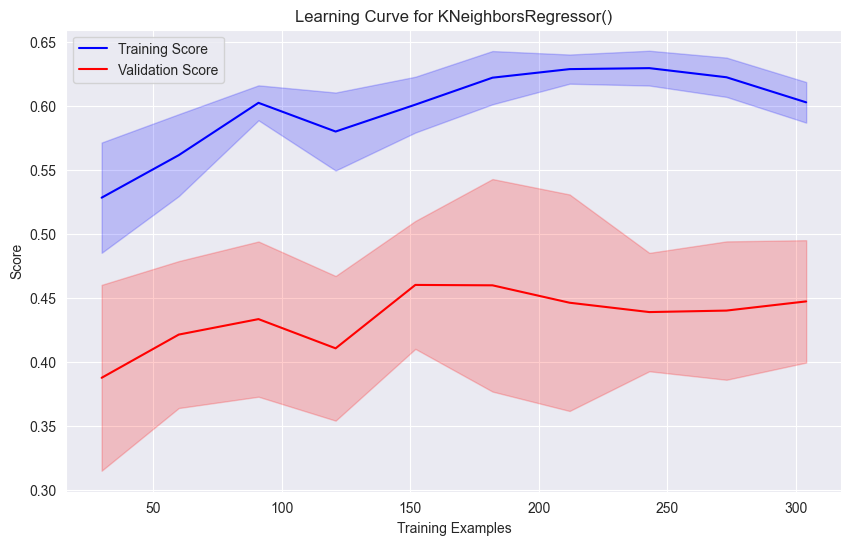

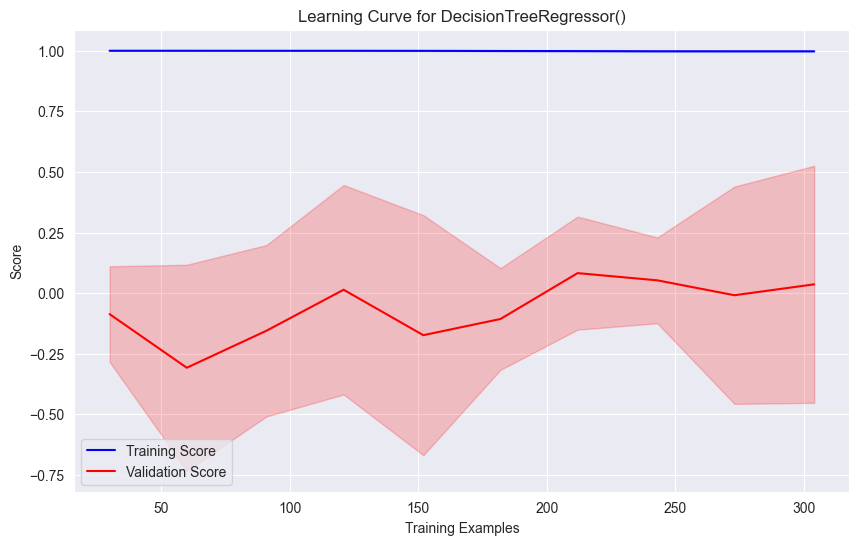

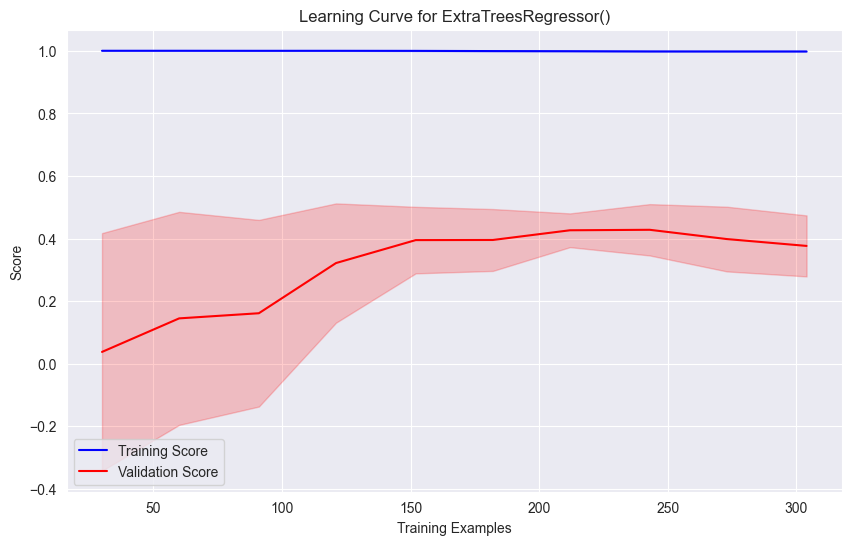

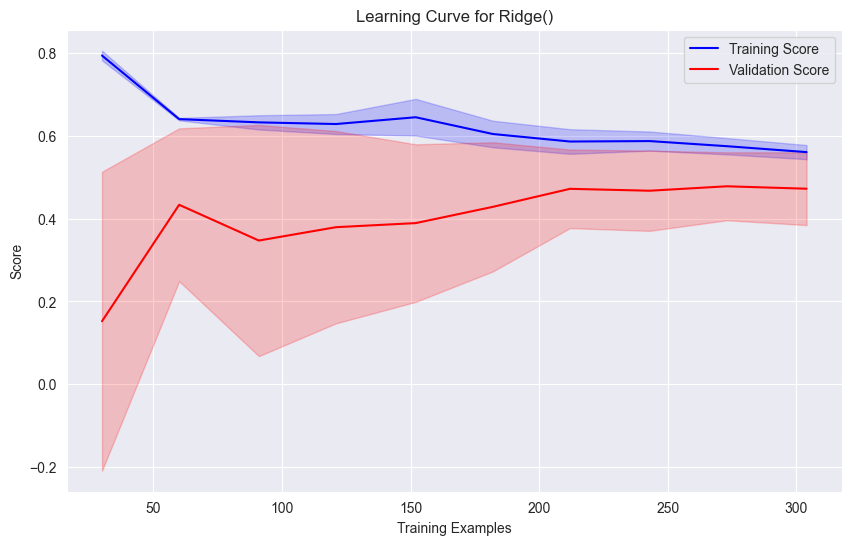

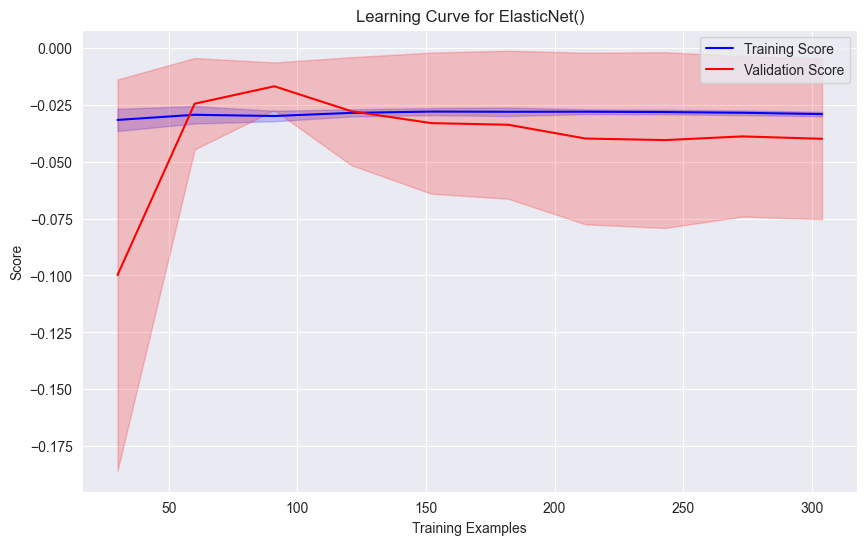

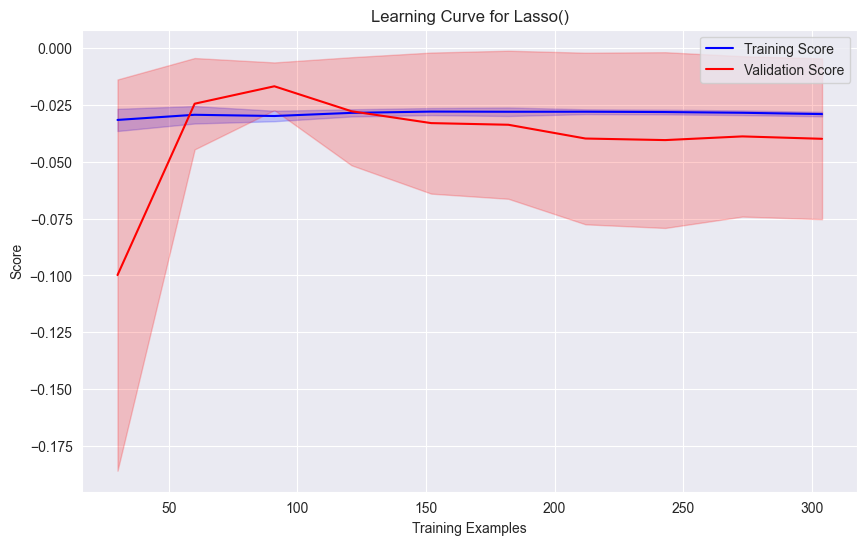

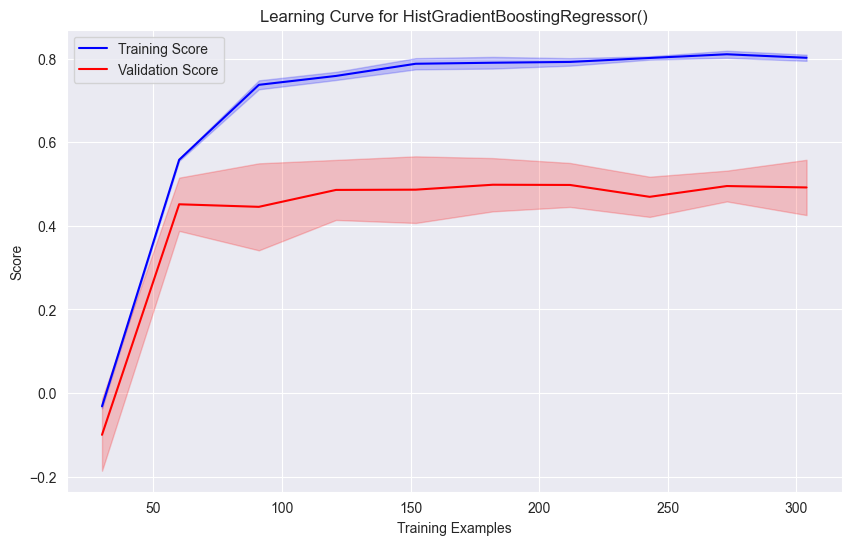

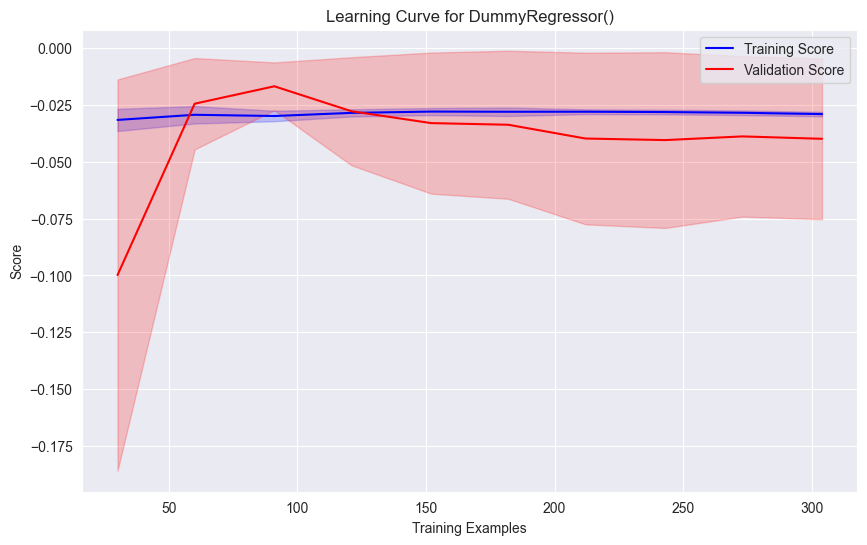

In [627]:
score_list = []
for i in range(len(model_list)):
    # fit a linear regression model to data
    model = TransformedTargetRegressor(regressor=model_list[i], func=np.log, inverse_func=np.exp)
    model.fit(X_train, y_train)

    # make predictions
    y_pred = model.predict(X_test)

    scores = pd.Series(cross_validate(model, X_train, y_train, cv=10, scoring=scoring_methods, return_train_score=True, n_jobs=-1)).apply(np.mean)
    score_list.append(scores)

    #plotting learning curve
    plot_learning_curve(model_list_names[i], model, X_train, y_train, np.linspace(0.1, 1.0, 10), 5)

In [628]:
scoring = pd.DataFrame(score_list, index=model_list)
display(scoring.style.apply(
        lambda x: [
            "background-color: red; color: white" if v else "" for v in x == x.min()
        ]
    )
    .apply(
        lambda x: [
            "background-color: green; color: white" if v else "" for v in x == x.max()
        ]
    ))

,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_neg_mean_squared_error,train_neg_mean_squared_error
LinearRegression(),0.003591,0.002792,0.480406,0.556306,-123590.359113,-119629.540120,-91390.099782,-87751.503047,-0.195606,-0.188616,-15877735764.124582,-14317190051.638758
AdaBoostRegressor(),0.066359,0.005286,0.499946,0.648360,-121390.986076,-106487.865094,-89604.709817,-80682.605324,-0.196803,-0.172798,-15382634297.208221,-11345149607.222061
GradientBoostingRegressor(),0.073394,0.003443,0.466784,0.820730,-121580.335282,-76047.021632,-87343.124470,-53986.139244,-0.190858,-0.118567,-15647312256.556519,-5791869881.185087
RandomForestRegressor(),0.187600,0.008088,0.450882,0.918584,-124770.535668,-51238.562315,-89463.027380,-34693.580339,-0.194055,-0.072518,-16258708346.519861,-2629601310.108383
KNeighborsRegressor(),0.002896,0.002191,0.418738,0.606077,-130909.632173,-112736.393087,-94476.956112,-77533.414170,-0.203101,-0.164702,-17978569595.874012,-12725400728.577988
DecisionTreeRegressor(),0.003397,0.001994,-0.016962,0.997456,-160658.452924,-9001.719794,-119863.331361,-1398.466404,-0.259064,-0.003589,-27415342455.356445,-81605065.505085
ExtraTreesRegressor(),0.143419,0.008278,0.346420,0.997456,-136449.105391,-9001.719794,-98273.453590,-1398.466404,-0.213572,-0.003589,-19243747085.918480,-81605065.505085
Ridge(),0.003782,0.002690,0.488830,0.557344,-122381.521707,-119487.242265,-90987.030379,-87674.141805,-0.195224,-0.188552,-15525149652.399857,-14283386114.592762
ElasticNet(),0.002596,0.002093,-0.062602,-0.029039,-179194.038338,-182213.074212,-137095.743128,-136486.426673,-0.304395,-0.302669,-33434464374.932873,-33216199981.213390
Lasso(),0.003089,0.001987,-0.062602,-0.029039,-179194.038338,-182213.074212,-137095.743128,-136486.426673,-0.304395,-0.302669,-33434464374.932873,-33216199981.213390


___

# Hyper Tuning

Since Ridge, Linear Regression, AdaBoost Regression, GradientBoosting Regression, HistGradientBoosting Regressor have the highest Test R^2 value. 

Linear Regression and Ridge do not really increase that much with an increase in training samples according to the above plotted learning curves. Thus i will take the other 3 with better learning rates and continue.

I will be continueing with there 3 models of AdaBoost, Gradient Boosting, and HistGradientBoosting and hyper tuning them.

In [629]:
parameters = {
    "regressor__n_estimators": [50, 100, 150],
    "regressor__learning_rate": [0.1, 0.01, 0.001]
    }
model = TransformedTargetRegressor(regressor=AdaBoostRegressor(), func=np.log, inverse_func=np.exp)
clfab = GridSearchCV(model, parameters, n_jobs=-1, scoring="r2", cv=5, verbose=True)
searchab = clfab.fit(X_train, y_train)
searchab.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


0.49273777516115835

In [630]:
parameters = {
    "regressor__n_estimators": [1, 10, 20, 30, 40, 50, 60, 70 , 80, 90, 100],
    "regressor__max_depth": [3, 5, 7, None], 
    "regressor__min_samples_split": [2, 4, 6, 8],
    "regressor__min_samples_leaf": [1, 2, 3, 4],
    "regressor__max_leaf_nodes": [None, 5, 10, 20]
    }
model = TransformedTargetRegressor(regressor=GradientBoostingRegressor(), func=np.log, inverse_func=np.exp)
clfgb = GridSearchCV(model, parameters, n_jobs=4, scoring="r2", cv=5, verbose=True)
searchgb = clfgb.fit(X_train, y_train)
searchgb.best_score_

Fitting 5 folds for each of 2816 candidates, totalling 14080 fits


0.5428578891091265

In [631]:
searchgb.best_params_

{'regressor__max_depth': 5,
 'regressor__max_leaf_nodes': 5,
 'regressor__min_samples_leaf': 2,
 'regressor__min_samples_split': 8,
 'regressor__n_estimators': 60}

In [632]:
parameters = {
    'regressor__max_depth': [3, 4, 5, 6, 7], 
    "regressor__min_samples_leaf": [1, 2, 5, 10],
    "regressor__max_leaf_nodes": [None, 5, 10, 20]
    }
model = TransformedTargetRegressor(regressor=HistGradientBoostingRegressor(), func=np.log, inverse_func=np.exp)
clfhgb = GridSearchCV(model, parameters, n_jobs=4, scoring="r2", cv=5, verbose=True)
searchhgb = clfhgb.fit(X_train, y_train)
searchhgb.best_score_

Fitting 5 folds for each of 80 candidates, totalling 400 fits


0.5241562759570499

Testing tuned models on test data

In [633]:
tuned_model_list = [searchab, searchgb, searchhgb]
dataset = df
for i in tuned_model_list:
    
    model = i
    print(str(model.best_estimator_).split("regressor=")[1].split("(")[0])
    print(model.best_params_)
    # make predictions
    expected = y_test
    predicted = model.predict(X_test)
    print("r^2 score: ", r2_score(expected, predicted))
    print("MSE: ", mean_squared_error(expected, predicted))
    print()

AdaBoostRegressor
{'regressor__learning_rate': 0.1, 'regressor__n_estimators': 150}
r^2 score:  0.4869193684989893
MSE:  21012469362.020927

GradientBoostingRegressor
{'regressor__max_depth': 5, 'regressor__max_leaf_nodes': 5, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 8, 'regressor__n_estimators': 60}
r^2 score:  0.4653878313401314
MSE:  21894262080.534073

HistGradientBoostingRegressor
{'regressor__max_depth': 4, 'regressor__max_leaf_nodes': 5, 'regressor__min_samples_leaf': 2}
r^2 score:  0.44713771449521567
MSE:  22641669013.310364



The Ada Boost model gives me the highest r^2 value. Thus I will export this as my chosen model

In [634]:
pickle.dump(searchab, open("Saved_models/Ada Boost CA1 Regression.p", "wb"))
searchab = pickle.load(open("Saved_models/Ada Boost CA1 Regression.p", "rb"))

Hyper tuned model

In [635]:
dataset = df
model = searchab
print(str(model.best_estimator_).split("regressor=")[1].split("(")[0])
print(model.best_params_)
# make predictions
expected = y_test
predicted = model.predict(X_test)
print("r^2: ", r2_score(expected, predicted))
print("MSE: ", mean_squared_error(expected, predicted))
print()

dataset = df
model = TransformedTargetRegressor(regressor=AdaBoostRegressor(), func=np.log, inverse_func=np.exp)
model.fit(X_train, y_train)
print("Default Model")
# make predictions
expected = y_test
predicted = model.predict(X_test)
print("r^2: ", r2_score(expected, predicted))
print("MSE: ", mean_squared_error(expected, predicted))
print()

dataset = df
model = TransformedTargetRegressor(regressor=DummyRegressor(), func=np.log, inverse_func=np.exp)
model.fit(X_train, y_train)
print("Dummy Model")
# make predictions
expected = y_test
predicted = model.predict(X_test)
print("r^2: ", r2_score(expected, predicted))
print("MSE: ", mean_squared_error(expected, predicted))

AdaBoostRegressor
{'regressor__learning_rate': 0.1, 'regressor__n_estimators': 150}
r^2:  0.4869193684989893
MSE:  21012469362.020927

Default Model
r^2:  0.47168660312767485
MSE:  21636305063.49189

Dummy Model
r^2:  -0.03921073014437626
MSE:  42559360629.06925


___

### Summary of hyper tuned data

The dummy regressor gave me a r^2 value of -0.04.

The AdaBoostRegressor model gave me a r^2 value of 0.469.

And the Hyper Tuned AdaBoostRegressor model gave me a r^2 value of 0.475.

Thus we can see that the AdaBoostRegressor model is significantly better than the baseline of the dummy model. It has an r^2 value of about 0.5 more than the dummy model.

We can see that the hyper tuned model also has a higher r^2 score, by about 0.01.

# Error Plotting

Here we can see the error plots of the Hyper Tuned Ada Booster, the Untuned Ada Booster, and the Dummy Regressor.

Dummy: We can see taht the line of best fit is very far from the identity line. This means that the model is not following the trend of prices.

Default: We can see that there is room for improvement here, as the best fit line is relatively far away, and lies under the identity line.

Hyper Tuned: We can see that the best fit line is below the identity line, so there is still room for improvement. However, the best fit line is closer here than is is for the default model.

In [636]:
def plot_prediction_error_plot(model, X, y, model_name, ax=None):
    y_pred = model.predict(X)
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(y, y_pred, c="red", marker="x")
    p1 = max(max(y_pred), max(y_test))
    p2 = min(min(y_pred), min(y_test))
    ax.plot([p1, p2], [p1, p2], "b--", label="Identity")
    a, b = np.polyfit(y, y_pred, 1)
    ax.plot(y, a * y + b, "g-", label="Best Fit")
    ax.legend()
    ax.set_xlabel("True Values")
    ax.set_ylabel("Predictions")
    ax.set_title(f"Prediction Error Plot using {model_name}")
    print(f"{model_name}'s R2: {r2_score(y,y_pred)}")
    return ax

Dummy Regressor's R2: -0.03921073014437626
Default Ada Booster's R2: 0.4747821684540109
Hyper Tuned Ada Booster's R2: 0.4869193684989893


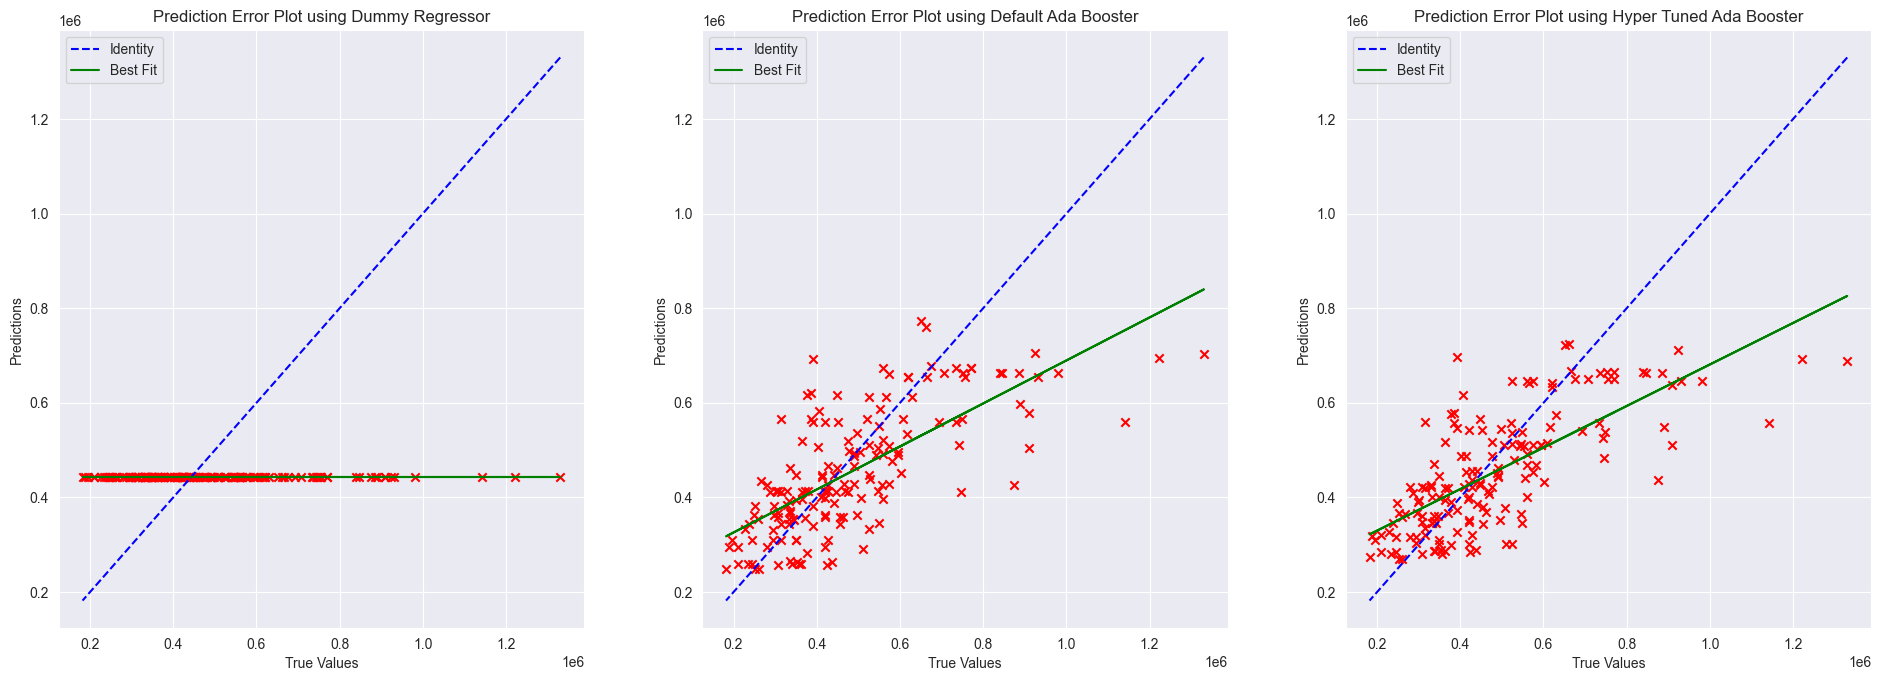

In [637]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))
plot_prediction_error_plot(TransformedTargetRegressor(regressor=DummyRegressor(), func=np.log, inverse_func=np.exp).fit(X_train, y_train), X_test, y_test, "Dummy Regressor", ax=ax1)
plot_prediction_error_plot(TransformedTargetRegressor(regressor=AdaBoostRegressor(), func=np.log, inverse_func=np.exp).fit(X_train, y_train), X_test, y_test, "Default Ada Booster", ax=ax2)
plot_prediction_error_plot(searchab, X_test, y_test, "Hyper Tuned Ada Booster", ax=ax3)

fig.tight_layout(pad=5.0)
plt.show()

___

# Model Visualization

[Text(0.5, 0.875, 'x[0] <= -0.489\nsquared_error = 0.126\nsamples = 381\nvalue = 12.997'),
 Text(0.25, 0.625, 'x[13] <= 0.5\nsquared_error = 0.072\nsamples = 160\nvalue = 12.765'),
 Text(0.125, 0.375, 'x[10] <= 0.5\nsquared_error = 0.058\nsamples = 94\nvalue = 12.873'),
 Text(0.0625, 0.125, 'squared_error = 0.046\nsamples = 80\nvalue = 12.91'),
 Text(0.1875, 0.125, 'squared_error = 0.075\nsamples = 14\nvalue = 12.66'),
 Text(0.375, 0.375, 'x[5] <= 0.053\nsquared_error = 0.052\nsamples = 66\nvalue = 12.611'),
 Text(0.3125, 0.125, 'squared_error = 0.034\nsamples = 47\nvalue = 12.675'),
 Text(0.4375, 0.125, 'squared_error = 0.061\nsamples = 19\nvalue = 12.452'),
 Text(0.75, 0.625, 'x[2] <= 1.5\nsquared_error = 0.097\nsamples = 221\nvalue = 13.165'),
 Text(0.625, 0.375, 'x[4] <= -0.0\nsquared_error = 0.067\nsamples = 146\nvalue = 13.039'),
 Text(0.5625, 0.125, 'squared_error = 0.074\nsamples = 38\nvalue = 12.878'),
 Text(0.6875, 0.125, 'squared_error = 0.052\nsamples = 108\nvalue = 13.096'

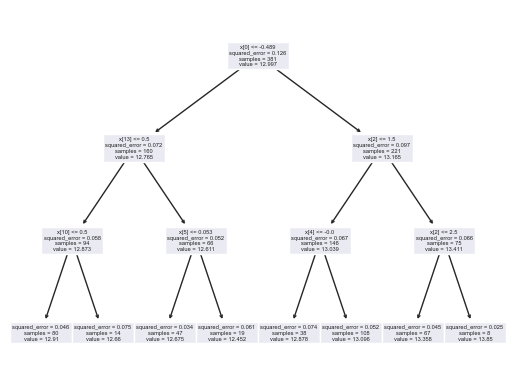

In [638]:
plot_tree(searchab.best_estimator_.regressor_[0])

___

# Feature Importance

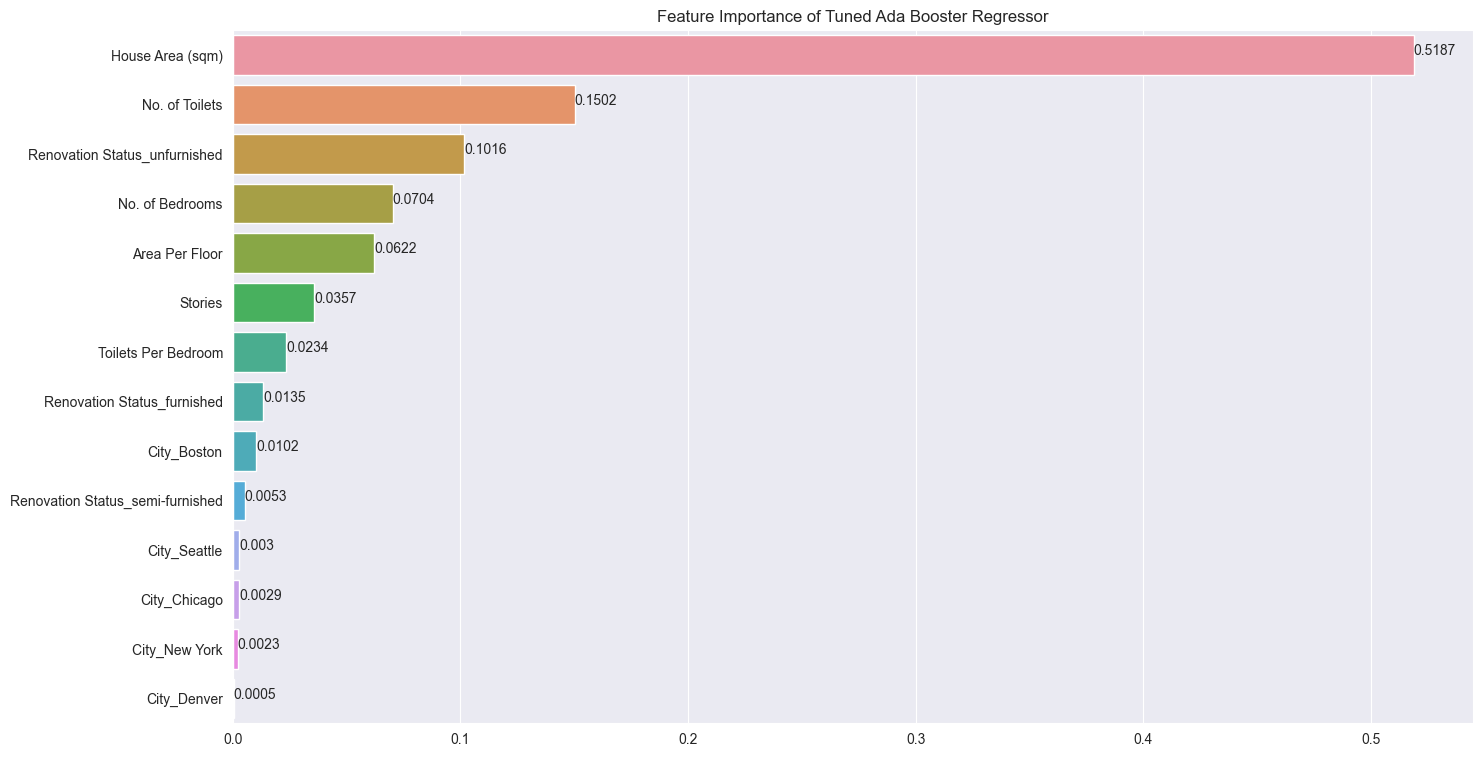

In [640]:
importance = pd.Series(
    searchab.best_estimator_.regressor_.feature_importances_, index=X.columns
).sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(16, 9))
sns.barplot(
    x=importance[importance > 0].values, y=importance[importance > 0].index, ax=ax
)
ax.set_title("Feature Importance of Tuned {}".format("Ada Booster Regressor"))
[
    ax.text(x=v, y=i, s=round(v, 4))
    for i, v in zip(np.arange(0, len(importance)), importance[importance > 0].values)
]
plt.show()

# Project summary

We have successfully created a model that is able to predict the price of houses. Using the hyper tuned Ada Boosting Regressor model, I have obtained an r^2 value of 0.475, and a Mean Squared Error of 21459697854. This means that my model can explain about 47.5% of the variance in my data. My model is also a huge improvement from a dummy model, and the default ada boosting regressor model. As shown in the error plot, there is still room to improve the model. However, in order for the model to be fully deployed, I believe that more data is needed in order to allow the model to train and test on more quality data.